#Oriented FAST and Rotated BRIEF

Use ORB to align images





In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import data, exposure
from google.colab.patches import cv2_imshow

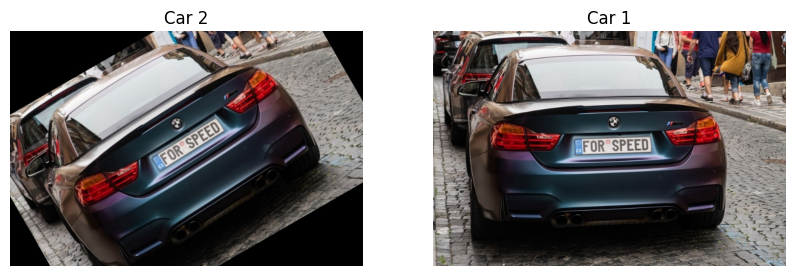

In [ ]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/car2.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/car1.jpg', cv2.IMREAD_COLOR)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Car 2')
plt.imshow(img1_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Car 1')
plt.imshow(img2_rgb)
plt.axis('off')

plt.show()


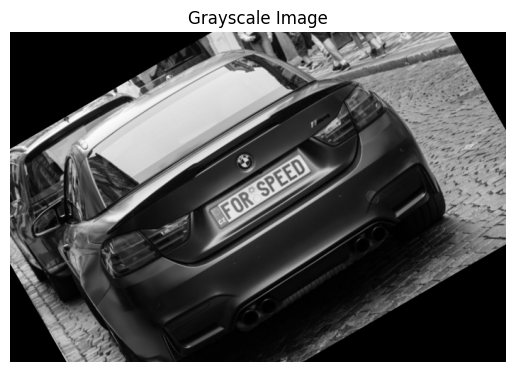

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.title('Grayscale Image')
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

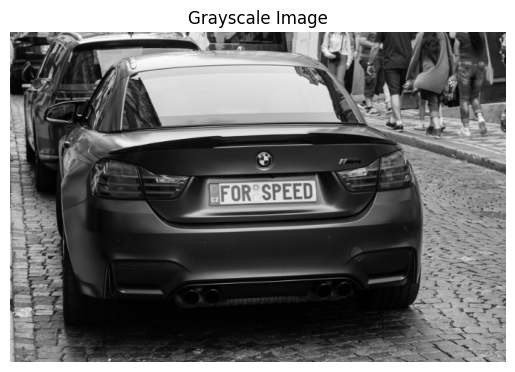

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.title('Grayscale Image')
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
orb=cv2.ORB_create(100)
k1,d1 = orb.detectAndCompute(img1, None)
k2,d2 = orb.detectAndCompute(img2, None)

In [ ]:
match = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = match.knnMatch(d1, d2, k=2)
matches = sorted(matches, key=lambda x:x[0].distance)

In [ ]:
match = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = match.match(d1, d2)
matches = sorted(matches, key=lambda x:x.distance)
ln = len(matches)
print(ln)

100


In [ ]:
point1 = np.zeros((ln, 2))
point2 = np.zeros((ln, 2))

In [ ]:
for i in range(ln):
  point1[i, :] = k1[matches[i].queryIdx].pt
  point2[i, :] = k2[matches[i].trainIdx].pt

In [ ]:
point1[0,:]

array([396.00003052,  82.80000305])

In [ ]:
point2[0,:]

array([464.40002441, 126.00000763])

In [ ]:
r,c = img1.shape

In [ ]:
H, mask = cv2.findHomography(point1, point2, cv2.RANSAC)

In [ ]:
print(H)

[[ 8.30552119e-01 -5.12662673e-01  1.66595539e+02]
 [ 4.81004622e-01  8.34810337e-01 -1.37016359e+02]
 [-5.18755304e-05 -6.54736110e-05  1.00000000e+00]]


In [ ]:
untilted_img = cv2.warpPerspective(img1, H,(c,r))

In [ ]:
h, w, _ = img2_rgb.shape
untilted_img = cv2.warpPerspective(img1_rgb, H, (w, h))

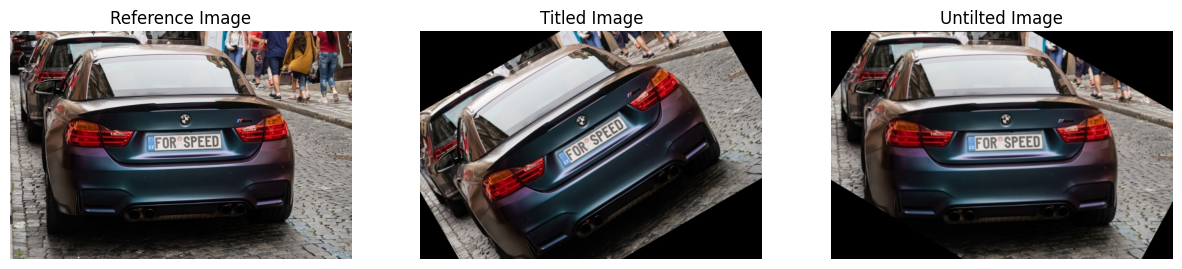

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Reference Image")
plt.imshow(img2_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Titled Image")
plt.imshow(img1_rgb)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Untilted Image")
plt.imshow(untilted_img)
plt.axis("off")

plt.show()


#conclusion :

Orb detector is used to detect the key points and their corresponding descriptors for reference and tilted image of car. Brute force matcher is used to match the descriptors , with minimum hammimg distance

locations of the matched keypoint are stored in a matrix in matrices which are used to generate homography matrix which is also called transformation variance
homography matrix is used to transform all the pixels of tilted image to untilt it

the same pocess is applied on the another image

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage import data, exposure
from google.colab.patches import cv2_imshow

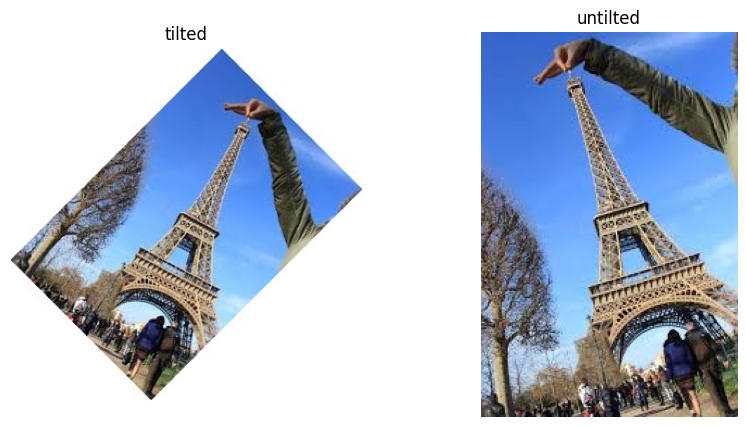

In [ ]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/imgonline-com-ua-Rotate360-zvmBzBaXwQQi5q.jpg', cv2.IMREAD_COLOR)
img2 = cv2.imread('/content/images.jpg', cv2.IMREAD_COLOR)

img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('tilted')
plt.imshow(img1_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('untilted')
plt.imshow(img2_rgb)
plt.axis('off')

plt.show()


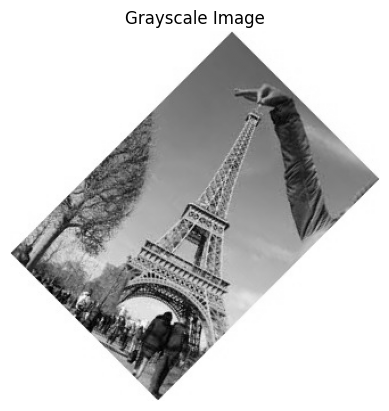

In [ ]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.title('Grayscale Image')
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

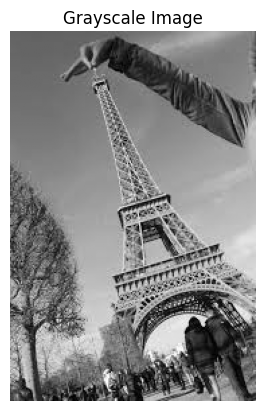

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.title('Grayscale Image')
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
orb=cv2.ORB_create(100)
k1,d1 = orb.detectAndCompute(img1, None)
k2,d2 = orb.detectAndCompute(img2, None)

In [ ]:
match = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = match.knnMatch(d1, d2, k=2)
matches = sorted(matches, key=lambda x:x[0].distance)

In [ ]:
match = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = match.match(d1, d2)
matches = sorted(matches, key=lambda x:x.distance)
ln = len(matches)
print(ln)

100


In [ ]:
point1 = np.zeros((ln, 2))
point2 = np.zeros((ln, 2))

In [ ]:
for i in range(ln):
  point1[i, :] = k1[matches[i].queryIdx].pt
  point2[i, :] = k2[matches[i].trainIdx].pt

In [ ]:
point1[0,:]

array([141.6000061, 255.6000061])

In [ ]:
point2[0,:]

array([142.80000305, 217.20001221])

In [ ]:
r,c = img1.shape

In [ ]:
H, mask = cv2.findHomography(point1, point2, cv2.RANSAC)

In [ ]:
print(H)

[[ 6.86060313e-01  6.45690987e-01 -1.27769693e+02]
 [-6.85780773e-01  6.24348826e-01  1.42235393e+02]
 [ 4.20089275e-05 -2.52557849e-04  1.00000000e+00]]


In [ ]:
untilted_img = cv2.warpPerspective(img1, H,(c,r))

In [ ]:
h, w, _ = img2_rgb.shape
untilted_img = cv2.warpPerspective(img1_rgb, H, (w, h))

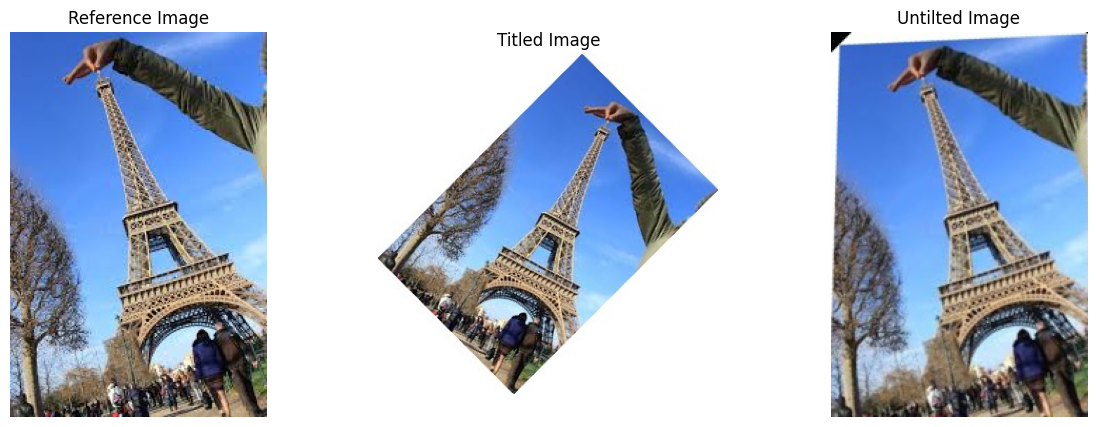

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Reference Image")
plt.imshow(img2_rgb)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Titled Image")
plt.imshow(img1_rgb)
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Untilted Image")
plt.imshow(untilted_img)
plt.axis("off")

plt.show()
